In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import os
print(os.listdir("dataset"))

['dataset1_bf.csv', 'telco-customer-churn.zip', 'dataset2_tc.csv', 'black-friday.zip', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'BlackFriday.csv']


In [2]:
df=pd.read_csv("dataset/dataset1_bf.csv")

In [3]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
#Firstly, I want to convert column name to lowercase.
df.columns = df.columns.str.lower()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [5]:
df.shape
# In this dataset, we have 537577 rows and 12 columns

(537577, 12)

In [6]:
df.head()
# In the "Product_Category_2" and "Product_Category_2", we already see there are a null values.

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.tail()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [8]:
df.info()
# we see that occupation and Marital_Status are integer but they must be string so we need to change their types.
# Moreover, we can change Product_Category_2 and Product_Category_3 to integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [9]:
df.isna().any()
# we have "na" value in Product_Category_2 and Product_Category_3

user_id                       False
product_id                    False
gender                        False
age                           False
occupation                    False
city_category                 False
stay_in_current_city_years    False
marital_status                False
product_category_1            False
product_category_2             True
product_category_3             True
purchase                      False
dtype: bool

In [10]:
df.isnull().sum()
# we have null values in Product_Category_2 (166986) and Product_Category_3 (373299)

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            166986
product_category_3            373299
purchase                           0
dtype: int64

In [11]:
df["product_category_2"].value_counts(dropna=False)
# In "Product_Category_2" we have 166986 null values.

NaN      166986
 8.0      63058
 14.0     54158
 2.0      48481
 16.0     42602
 15.0     37317
 5.0      25874
 4.0      25225
 6.0      16251
 11.0     13945
 17.0     13130
 13.0     10369
 9.0       5591
 12.0      5419
 10.0      2991
 3.0       2835
 18.0      2730
 7.0        615
Name: product_category_2, dtype: int64

In [12]:
df["product_category_3"].value_counts(dropna=False)
# In "Product_Category_3" we have 373299 null values.

NaN      373299
 16.0     32148
 15.0     27611
 14.0     18121
 17.0     16449
 5.0      16380
 8.0      12384
 9.0      11414
 12.0      9094
 13.0      5385
 6.0       4818
 18.0      4563
 4.0       1840
 11.0      1773
 10.0      1698
 3.0        600
Name: product_category_3, dtype: int64

In [13]:
# We replace "0" to null values.
df.fillna(0,inplace=True)
df.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [14]:
df["occupation"]=df["occupation"].astype("object")
df.marital_status=df.marital_status.astype("object")
df.product_category_2=df.product_category_2.astype(int)
df.product_category_3=df.product_category_3.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null object
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null object
product_category_1            537577 non-null int64
product_category_2            537577 non-null int64
product_category_3            537577 non-null int64
purchase                      537577 non-null int64
dtypes: int64(5), object(7)
memory usage: 49.2+ MB


In [15]:
df.dtypes
# We have 7 strings and 5 integer.

user_id                        int64
product_id                    object
gender                        object
age                           object
occupation                    object
city_category                 object
stay_in_current_city_years    object
marital_status                object
product_category_1             int64
product_category_2             int64
product_category_3             int64
purchase                       int64
dtype: object

In [16]:
df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].describe()

,product_category_1,product_category_2,product_category_3,purchase
count,537577.000000,537577.000000,537577.000000,537577.000000
mean,5.295546,6.784907,3.871773,9333.859853
std,3.750701,6.211618,6.265963,4981.022133
min,1.000000,0.000000,0.000000,185.000000
25%,1.000000,0.000000,0.000000,5866.000000
50%,5.000000,5.000000,0.000000,8062.000000
75%,8.000000,14.000000,8.000000,12073.000000
max,18.000000,18.000000,18.000000,23961.000000


In [17]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

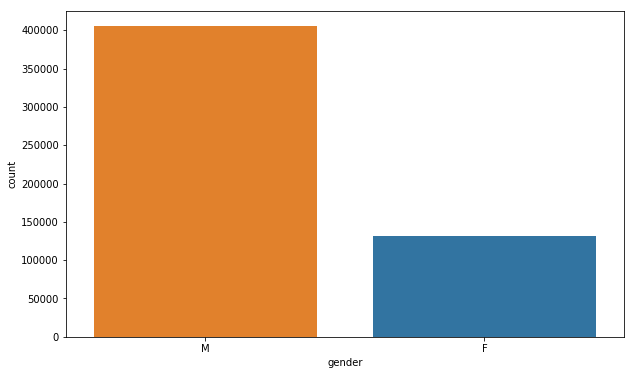

In [18]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(df.gender)
plt.gca().invert_xaxis()
plt.show()
# We saw that males are much more bought the product in black friday.

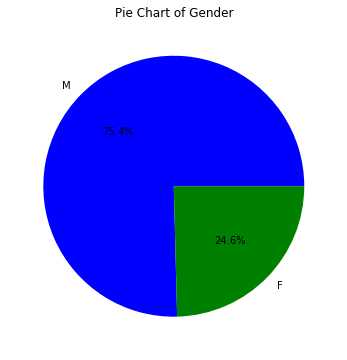

In [19]:
plt.figure(figsize=(10,6))
plt.pie(df.gender.value_counts().values,explode=(0,0),labels=df.gender.value_counts().index,colors=("blue","green"),autopct="%1.1f%%")
plt.title("Pie Chart of Gender")
plt.show()
# We also see that male percentage is 75.4 and female percentage is 24.6.

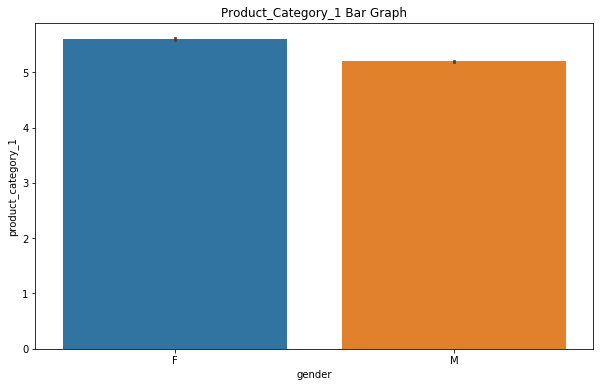

In [20]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_1,data=df)
plt.title("Product_Category_1 Bar Graph")
plt.show()
# we see that females are buy more products_category_1.

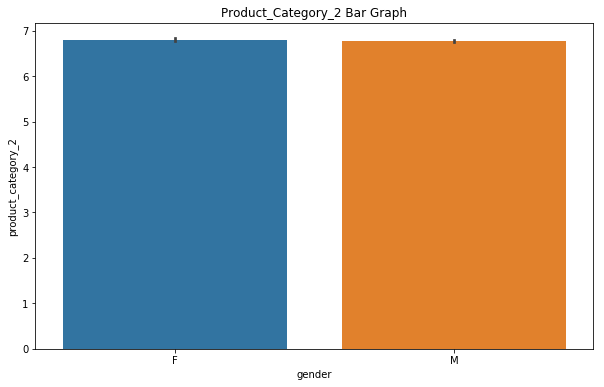

In [21]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_2,data=df)
plt.title("Product_Category_2 Bar Graph")
plt.show()

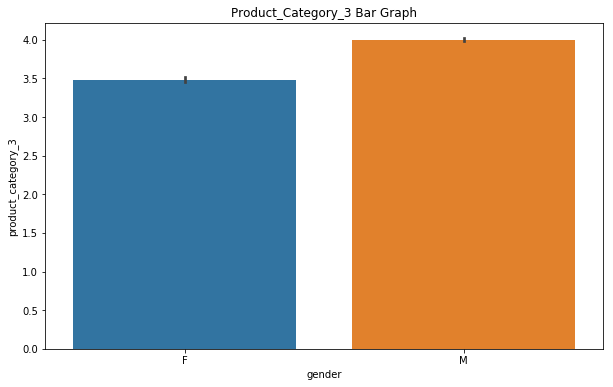

In [22]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_3,data=df)
plt.title("Product_Category_3 Bar Graph")
plt.show()
# we see that males are mostly prefer to buy more products_category_3.

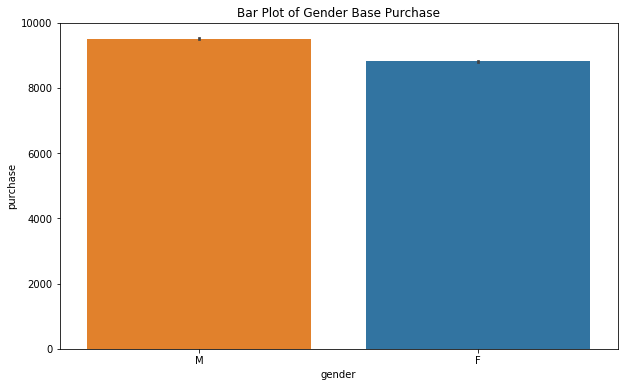

In [23]:
f,ax=plt.subplots(figsize=(10,6))
ax=sb.barplot(x="gender",y="purchase",data=df,ax=ax)
plt.title("Bar Plot of Gender Base Purchase")
plt.gca().invert_xaxis()
plt.show()

In [24]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

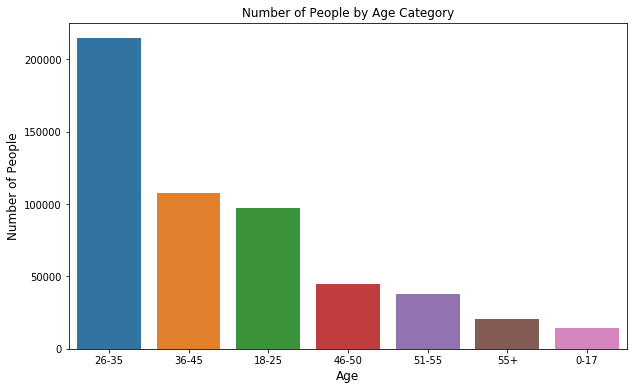

In [25]:
f,ax=plt.subplots(figsize=(10,6))
df_age_sorted=df.age.value_counts()
sb.barplot(x=df_age_sorted.index,y=df_age_sorted.values)
plt.title("Number of People by Age Category")
plt.xlabel("Age",size=12)
plt.ylabel("Number of People",size=12)
plt.show()
# we see that mostly 26-35 age group buy products in black friday.

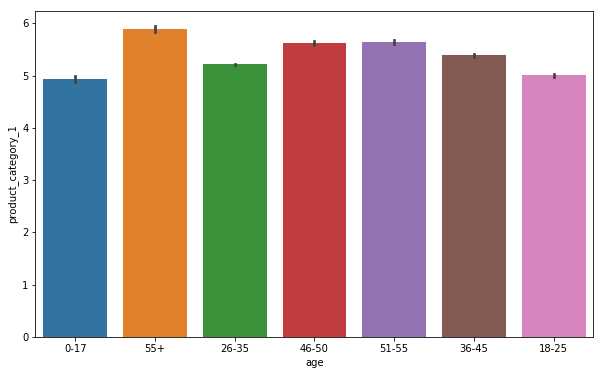

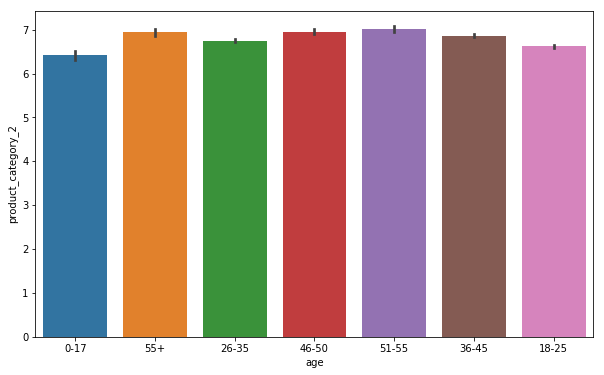

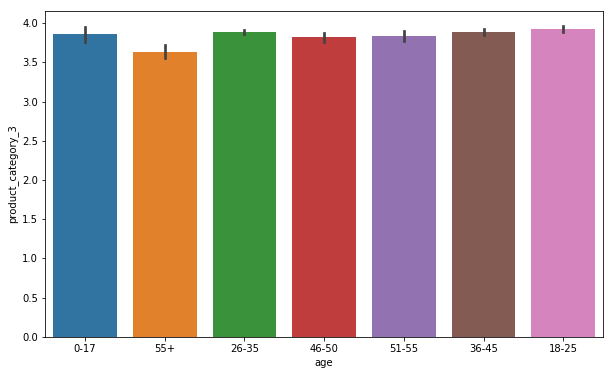

In [26]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_1)
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_2)
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_3)
plt.show()

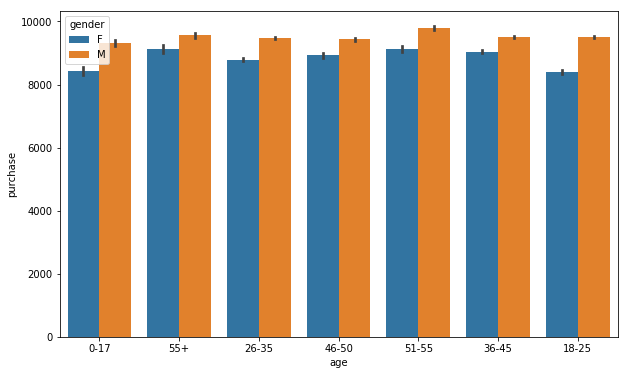

In [27]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.purchase,hue=df.gender)
plt.show()

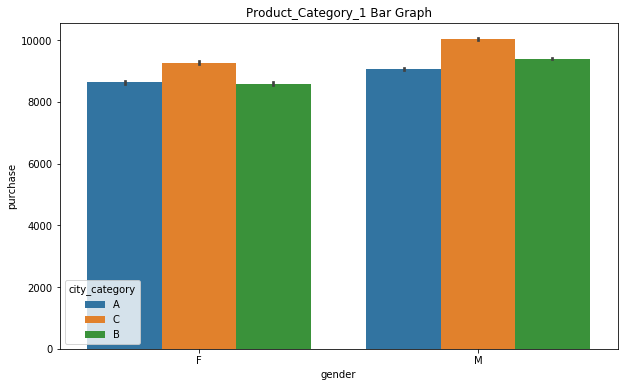

In [28]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.purchase,hue=df.city_category)
plt.title("Product_Category_1 Bar Graph")
plt.show()
# we see that females are buy more products_category_1.

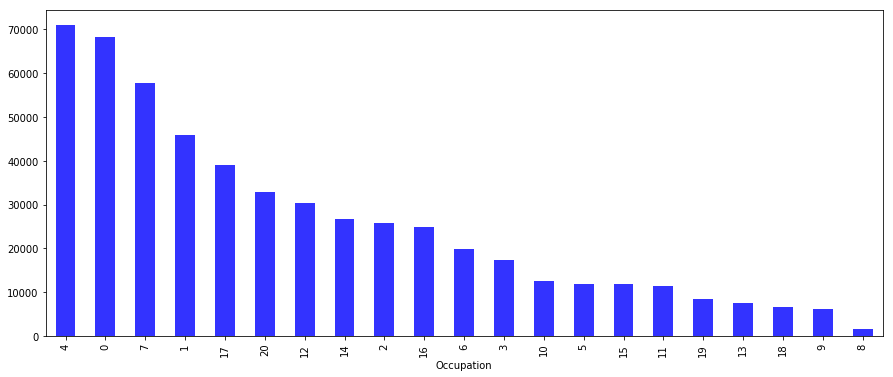

In [29]:
df.occupation.value_counts().plot(kind="bar",color="b",alpha=.8,figsize=(15,6))
plt.xlabel("Occupation")
plt.show()
# We see that occupations number 4 and 0 are the ones that bought the most on Friday.

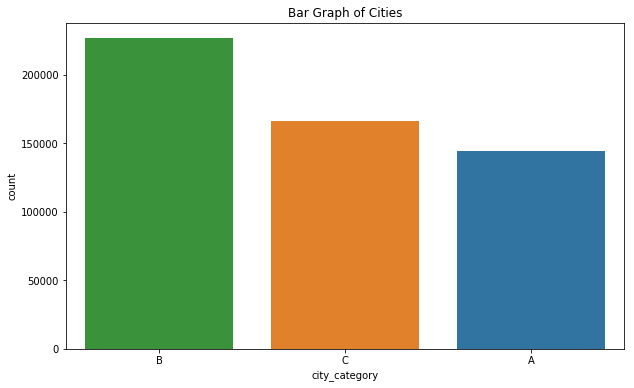

In [30]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(df.city_category)
plt.title("Bar Graph of Cities")
plt.gca().invert_xaxis()
plt.show()
# In city B, customers bought more products than other cities.

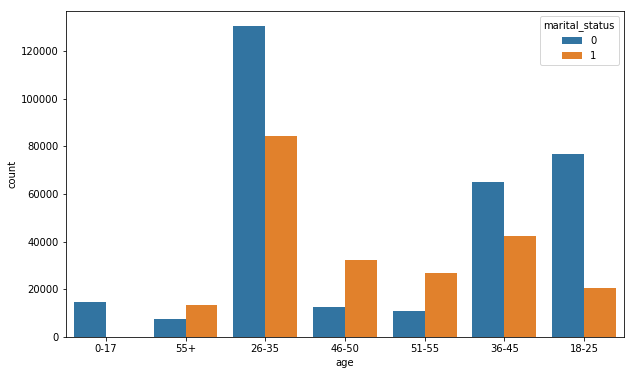

In [31]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(x=df.age,hue=df.marital_status)
plt.show()
# Maried couple spend less money in the black friday compared to single people.

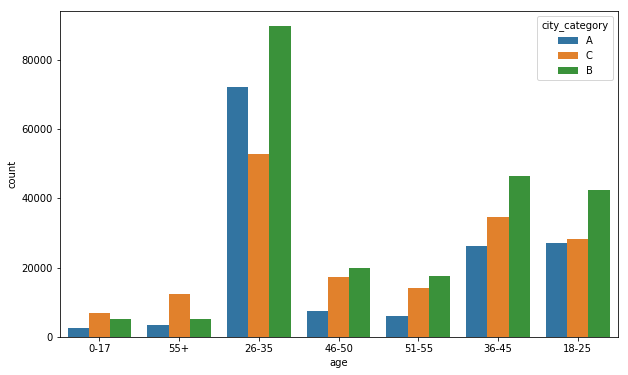

In [32]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(x=df.age,hue=df.city_category)
plt.show()

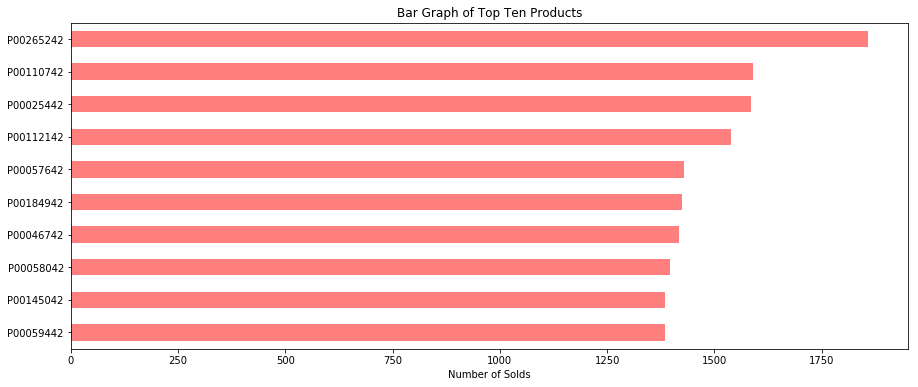

In [33]:
plt.rcParams["axes.facecolor"]="w"
df["product_id"].value_counts()[:10].plot(kind="barh",color="r",alpha=.5,figsize=(15,6))
plt.title("Bar Graph of Top Ten Products")
plt.xlabel("Number of Solds")
plt.gca().invert_yaxis()
plt.show()

In [34]:
df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].corr()

,product_category_1,product_category_2,product_category_3,purchase
product_category_1,1.000000,-0.040730,-0.389048,-0.314125
product_category_2,-0.040730,1.000000,0.090284,0.038395
product_category_3,-0.389048,0.090284,1.000000,0.284120
purchase,-0.314125,0.038395,0.284120,1.000000


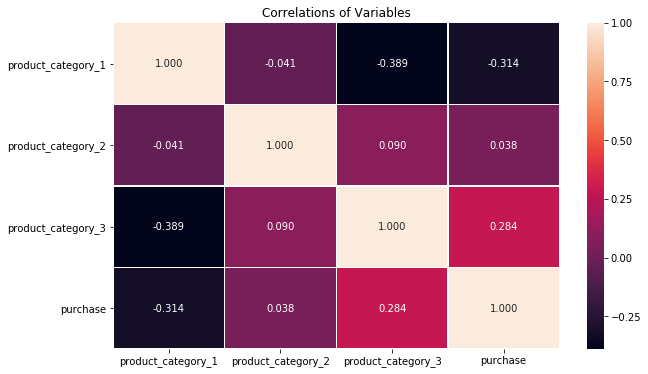

In [35]:
f,ax=plt.subplots(figsize=(10,6))
sb.heatmap(df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].corr(),annot=True,linewidth=.5,fmt=".3f",ax=ax)
plt.title("Correlations of Variables")
plt.show()

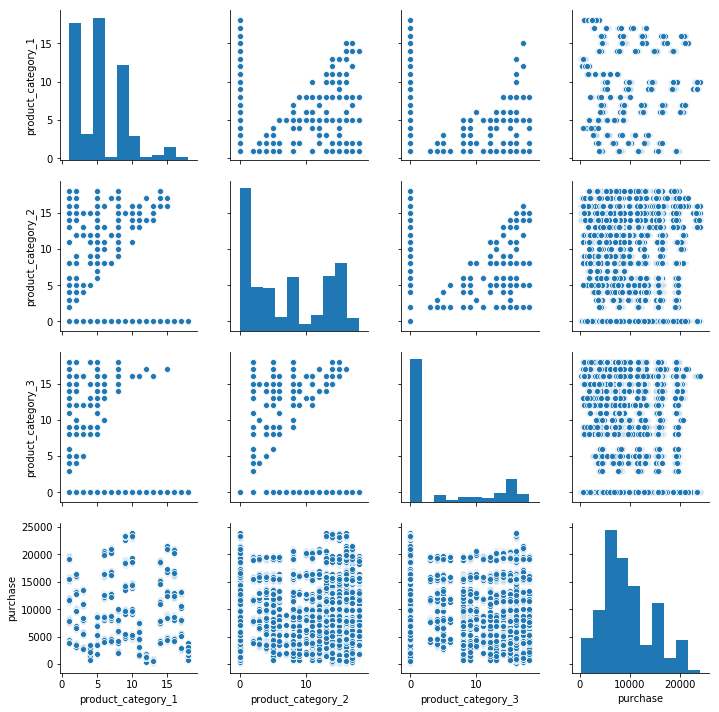

In [36]:
sb.pairplot(df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]])
plt.show()

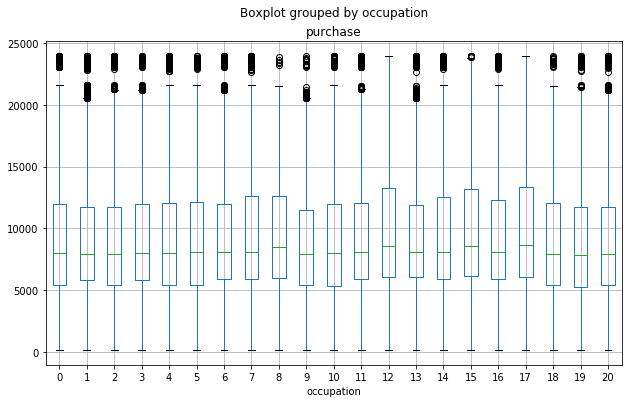

In [37]:
df.boxplot(column="purchase",by="occupation",figsize=(10,6))
plt.show()
# There are outliers almost in each occupations group.

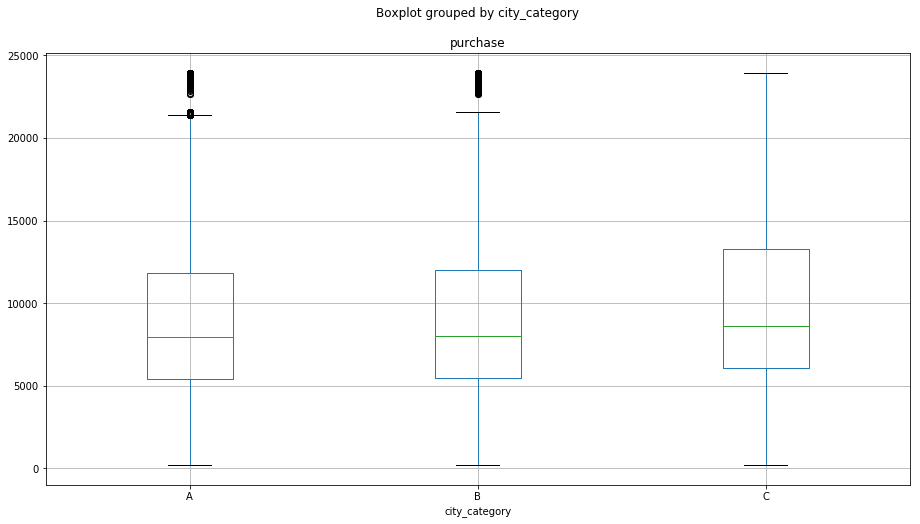

In [38]:
df.boxplot(column="purchase",by="city_category",figsize=(15,8))
plt.show()
# There are outliers in city of A and B.

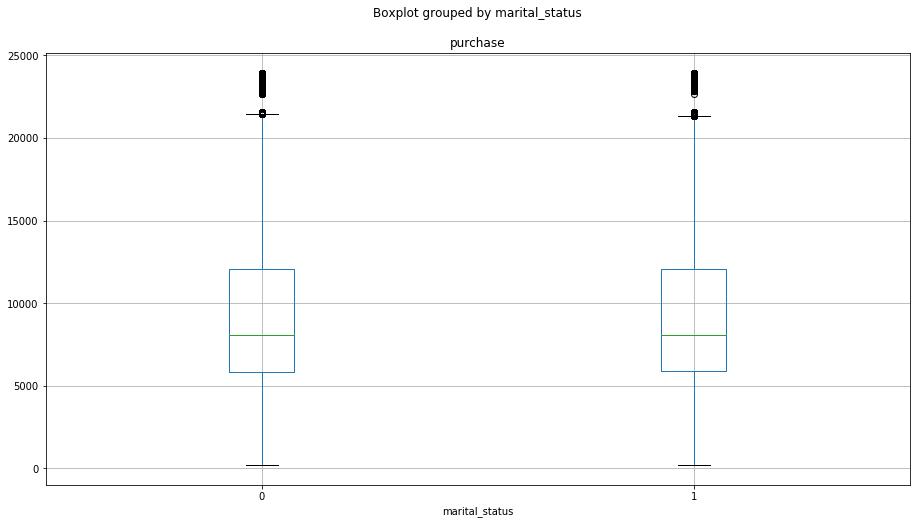

In [39]:
df.boxplot(column="purchase",by="marital_status",figsize=(15,8))
plt.show()
# There are outliers in each group.

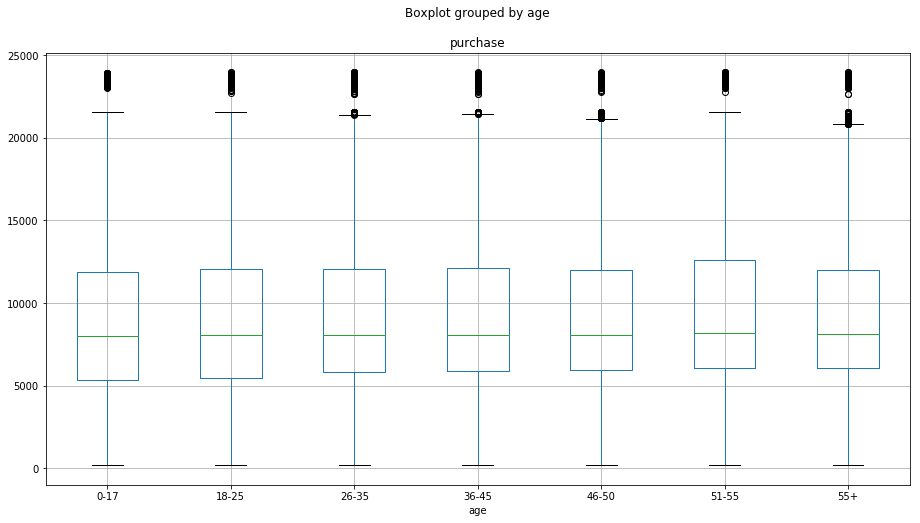

In [40]:
df.boxplot(column="purchase",by="age",figsize=(15,8))
plt.show()

In [41]:
df_product_category_1_normalize=(df.product_category_1-df.product_category_1.mean())/df.product_category_1.std()
df_product_category_2_normalize=(df.product_category_2-df.product_category_2.mean())/df.product_category_2.std()
df_product_category_3_normalize=(df.product_category_3-df.product_category_3.mean())/df.product_category_3.std()
df_purchase_normalize=(df.purchase-df.purchase.mean())/df.purchase.std()
# Now,we normalize our values.

normalize_data=pd.concat([df_product_category_1_normalize,df_product_category_2_normalize,df_product_category_3_normalize,df_purchase_normalize]
                         ,axis=1)
normalize_data.head()

,product_category_1,product_category_2,product_category_3,purchase
0,-0.612031,-1.092293,-0.617905,-0.193506
1,-1.145265,-0.126361,1.616388,1.177698
2,1.787520,-1.092293,-0.617905,-1.588401
3,1.787520,1.161548,-0.617905,-1.661679
4,0.721053,-1.092293,-0.617905,-0.274012
